In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import aplpy
from astropy import units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns
sns.set(font="times",font_scale=1.3,style="ticks")
import matplotlib as mpl
mpl.rc('text', usetex=True)
from zero_point import zpt
zpt.load_tables()
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

332 790


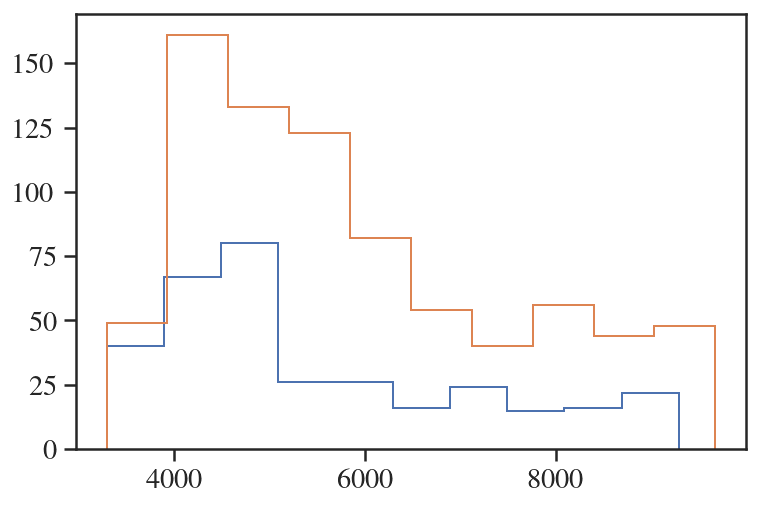

In [36]:
d1 = pd.read_csv("../match_final/NGC_6405.csv")
d2 = pd.read_csv("../match_final/NGC_3532.csv")
d1 = d1[~np.isnan(d1.teff_val)&(d1.parallax>0)]
d2 = d2[~np.isnan(d2.teff_val)&(d2.parallax>0)]
print(len(d1),len(d2))
fig,ax=plt.subplots()
plt.hist(d1.teff_val,histtype="step",bins=10)
plt.hist(d2.teff_val,histtype="step",bins=10)
plt.show()

In [11]:
d

,source_id,ra,dec,l,b,phot_g_mean_mag,bp_rp,parallax,parallax_error,priam_flags,flame_flags,a_g_val,e_bp_min_rp_val,teff_val,radius_val,radius_percentile_lower,radius_percentile_upper,original_ext_source_id,j_m,h_m,ks_m,diff_min
1,4054136045839191296,265.539802,-32.717596,356.389839,-1.349024,12.113923,0.778676,2.150635,0.053832,100001.0,200111.0,NaN,NaN,5926.6665,1.431839,1.205589,1.663434,17420955-3243033,11.094,10.795,10.704,0.000027
2,4054141749556377600,265.155161,-32.816671,356.134737,-1.126807,14.962554,1.463680,2.256765,0.064258,100001.0,200111.0,0.4940,0.2325,4415.5000,0.766587,0.716571,0.786950,17403724-3248599,13.086,12.536,12.502,0.000028
3,4054142917787512832,265.160389,-32.788547,356.160921,-1.115628,13.557357,1.085788,2.105050,0.035044,100001.0,200111.0,0.5380,0.2795,4998.9077,1.116028,1.059507,1.154152,17403848-3247185,12.083,11.591,11.557,0.000026
5,4054144493987952384,265.289012,-32.694012,356.298426,-1.157354,16.534470,2.108739,2.139363,0.107791,100001.0,200111.0,1.6330,0.8115,3661.0000,0.716821,0.522644,0.745766,17410937-3241383,14.167,11.678,11.034,0.000027
6,4054145700926773760,265.445138,-32.772655,356.301046,-1.310410,15.764114,2.113253,2.155099,0.075306,100001.0,200111.0,NaN,NaN,3655.6667,1.019512,0.760569,1.064253,17414684-3246214,13.285,11.403,10.933,0.001788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4055092101211407744,264.855181,-31.739067,356.913012,-0.339440,11.796835,0.737385,2.100205,0.054924,100001.0,200111.0,0.9650,0.4780,6370.1504,1.460117,1.281486,1.638538,17392522-3144205,10.781,10.473,10.263,0.000023
496,4055093445541241344,264.900938,-31.718000,356.951565,-0.361171,15.021542,1.465597,2.196731,0.050535,100001.0,200111.0,0.4890,0.2423,4400.0000,0.774498,0.665132,0.787690,17393624-3143048,13.151,12.506,12.337,0.000025
497,4055094613772368896,264.847608,-31.680812,356.958889,-0.302963,15.996429,1.852679,2.222141,0.058937,100001.0,200111.0,0.9637,0.4590,3885.3333,0.726670,0.612945,0.756683,17392343-3140509,13.713,12.875,12.034,0.000025
498,4055105574530420864,265.399839,-31.671697,357.215917,-0.696526,16.876140,2.326529,2.373780,0.200636,100001.0,NaN,NaN,NaN,3773.5000,NaN,NaN,NaN,17413596-3140181,14.343,13.538,13.269,0.000025
